1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

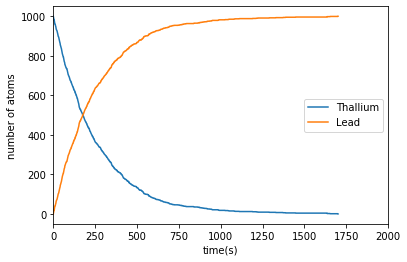

In [2]:
tau = 3.052*60 #in seconds
ntl = [1000] #atoms of thallium
npb = [0] #atoms of lead

#probability function
def p(t,tau):
    return 1-2**(-1/tau)


time = 0
while(ntl[-1]>0):
    decayed = sum([np.random.rand()<p(time,tau) for i in range(ntl[-1])])
    ntl.append(ntl[-1]-decayed)
    npb.append(npb[-1]+decayed)
    time = time + 1

#plot
plt.plot(ntl,label="Thallium")
plt.plot(npb,label="Lead")
plt.legend()
plt.xlabel("time(s)")
plt.ylabel("number of atoms")
plt.xlim((0,2000))
plt.show()

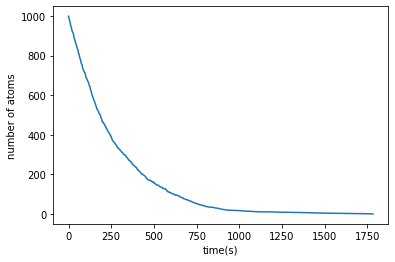

In [3]:
#inverse transform
def inverse(prob,tau):
    return -tau * np.log2(1-prob) 

#drawn
num = np.random.rand(1000)
times = inverse(num,tau)

#plot
decayed = np.array(range(1,1001))
plt.plot(np.sort(times),1000-decayed)
plt.xlabel("time(s)")
plt.ylabel("number of atoms")
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
#set the values
Z = 79
e = 1.6e-19
E = 7.7e6*e
a0 = 5.292e-11
sigma = a0/100
N = 1000000
eps0 = 8.854e-12
mean = (0,0)

#generate the 2D gaussian
cov = [[sigma**2,0],[0,sigma**2]]
beam = np.random.multivariate_normal(mean,cov,size=N)

#scattering rule
b = np.linalg.norm(beam,axis=1)
theta = 2*np.arctan(Z*e**2/(2*np.pi*eps0*E*b))

#final computation
bounced = np.sum(theta>np.pi/2)
print("Fraction of particles that bounce back:", str(bounced/N))

Fraction of particles that bounce back: 0.001563


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [6]:
#define the function
def f(x):
    return (np.sin(1/(x*(2-x))))**2

#hit/miss
N=100000
hit=0
for i in range(N):
    x=2*np.random.random()
    y=np.random.random()
    if y<f(x): 
        hit+=1

I=2*hit/N
err = 2/N*np.sqrt(hit-hit**2/N)
print("hit/miss method")
print("I =", str(I))
print("Error = ", str(err))
print()

#mean value
s = 0
for i in range(N):
    x=2*np.random.random()
    y = f(x)
    s = s + y
    
I = 2*s/N
x = np.linspace(1e-3,2-1e-3,N)
err = 2*np.std(f(x))/np.sqrt(N)

print("mean value method")
print("I =", str(I))
print("Error =", str(err))

#comparison
#As expected, the error is slightly lower for the mean value method, that is more precise

hit/miss method
I = 1.4518
Error =  0.0028211287811796193

mean value method
I = 1.451810050399503
Error = 0.0016651223840535296


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [7]:
#With hit miss method
N=100000
hit=0
for i in range(N):
    x= 2*np.random.random() - 1
    y= 2*np.random.random() - 1
    if x**2+y**2<=1: 
        hit+=1

I= 2*2*hit/N

print("Area of the circle =", str(I))

#generalization
hit=0
for i in range(N):
    n_dim = 10
    x = np.random.uniform(-1, 1, n_dim)
    if np.sum(x**2) <= 1: 
        hit+=1
        
I= (2**n_dim)*hit/N

print("Area of a 10D sphere =", str(I))

Area of the circle = 3.13492


NameError: name 'count' is not defined

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [13]:
#define f 
def f(x):
    return x**(-1/2)/(np.exp(x)+1)

#define w and the related iw
def w(x):
    return 1/x**(1/2)
def iw(a,b):
    return 2*(np.sqrt(b)-np.sqrt(a))

N = 10000
x = np.random.rand(N)**2
I = 1/N*np.sum(f(x)/w(x))*iw(0,1)
print("I =", str(I))

I = 0.838232211071732
